In [1]:
import sklearn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# synthetic classification dataset
from sklearn.datasets import make_classification

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [3]:
# define the model
model = LogisticRegression()

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [4]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.random_projection import SparseRandomProjection
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline

In [5]:
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model1 = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

X_pca = PCA(n_components=10).fit_transform(X)

Accuracy: 0.824 (0.034)


In [6]:
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model2 = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))

X_svd = TruncatedSVD(n_components=10).fit_transform(X)

Accuracy: 0.824 (0.034)


In [7]:
# define the pipeline
steps = [('jl', SparseRandomProjection(n_components=10)), ('pca', PCA(n_components=5)), ('m', LogisticRegression())]
model3 = Pipeline(steps=steps)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores3 = cross_val_score(model3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))

X_jl = SparseRandomProjection(n_components=10).fit_transform(X)

Accuracy: 0.787 (0.048)


In [8]:
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=10)), ('m', LogisticRegression())]
model4 = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores4 = cross_val_score(model4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores4), std(n_scores4)))

X_lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(X)

Accuracy: 0.816 (0.040)


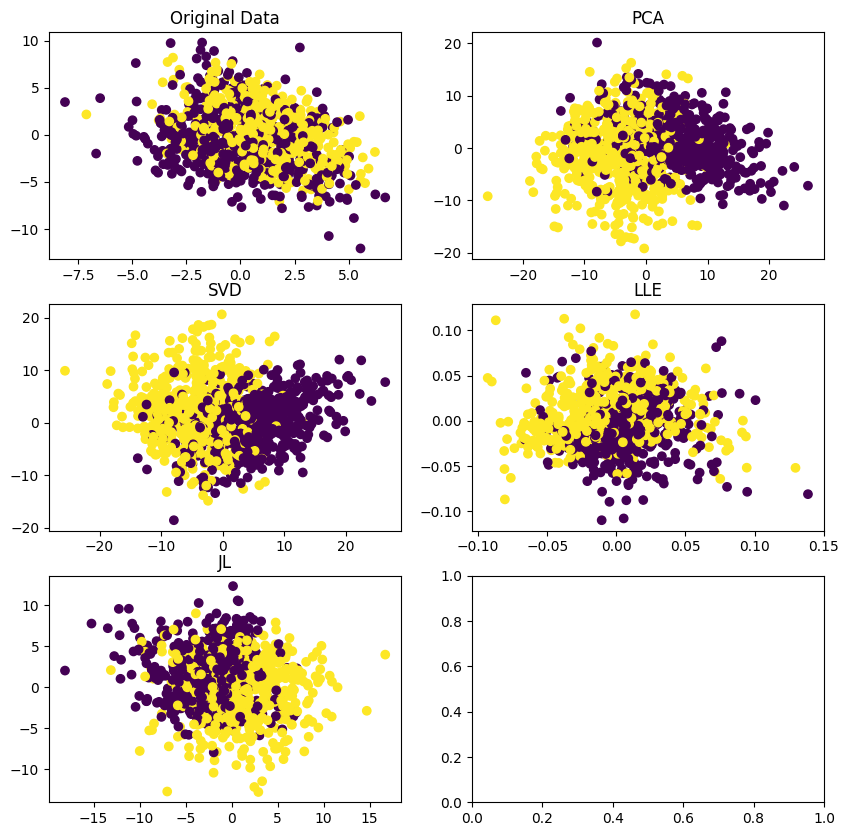

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title('Original Data')

axs[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axs[0, 1].set_title('PCA')

axs[1, 0].scatter(X_svd[:, 0], X_svd[:, 1], c=y)
axs[1, 0].set_title('SVD')

axs[1, 1].scatter(X_lle[:, 0], X_lle[:, 1], c=y)
axs[1, 1].set_title('LLE')

axs[2, 0].scatter(X_jl[:, 0], X_jl[:, 1], c=y)
axs[2, 0].set_title('JL')
plt.show()